In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.combine import SMOTETomek
from sklearn.model_selection import GridSearchCV

In [68]:
df = pd.read_csv('waterQuality1.csv')

In [69]:
df.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [70]:
df.dtypes

aluminium      float64
ammonia         object
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe         object
dtype: object

In [71]:
df_filtered = df[df['is_safe'].isin(['0', '1'])].copy()
df_filtered['is_safe'] = df_filtered['is_safe'].astype(int)
df_filtered['ammonia'] = pd.to_numeric(df_filtered['ammonia'], errors='coerce', downcast='float')

In [72]:
df_filtered

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.080000,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.160000,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.020000,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.330000,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.330000,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.780000,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.219999,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.850000,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10.000000,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
# df_filtered['is_safe'].value_counts()

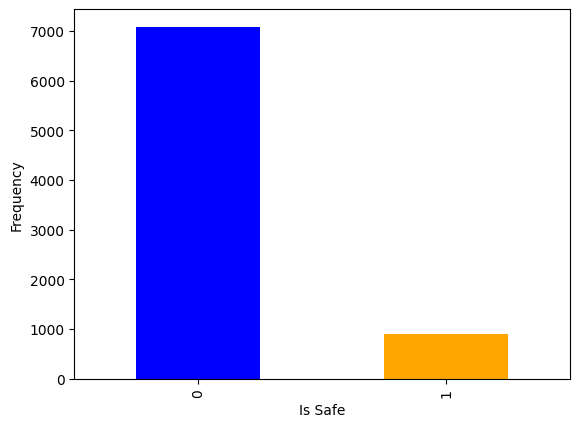

In [74]:
df_filtered['is_safe'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Is Safe')
plt.ylabel('Frequency')
plt.show()

In [75]:
X = df_filtered.drop('is_safe', axis=1)
y = df_filtered['is_safe']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)
smt = SMOTETomek(random_state=111)

X_resampled, y_resampled = smt.fit_resample(X_train, y_train)
print(pd.Series(y_resampled).value_counts())


1    5594
0    5594
Name: is_safe, dtype: int64


In [76]:
dt_clf = DecisionTreeClassifier(random_state=111)
dt_clf.fit(X_resampled, y_resampled)
y_pred_dt = dt_clf.predict(X_test)

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("Decision Tree Accuracy on test set:", accuracy_score(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1429
           1       0.68      0.87      0.76       171

    accuracy                           0.94      1600
   macro avg       0.83      0.91      0.86      1600
weighted avg       0.95      0.94      0.95      1600

Decision Tree Accuracy on test set: 0.941875


In [77]:
random_forest = RandomForestClassifier(n_estimators=50, random_state=111)
random_forest.fit(X_resampled, y_resampled)

y_pred = random_forest.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy on test:", accuracy_score(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1429
           1       0.74      0.82      0.78       171

    accuracy                           0.95      1600
   macro avg       0.86      0.89      0.88      1600
weighted avg       0.95      0.95      0.95      1600

Accuracy on test: 0.950625


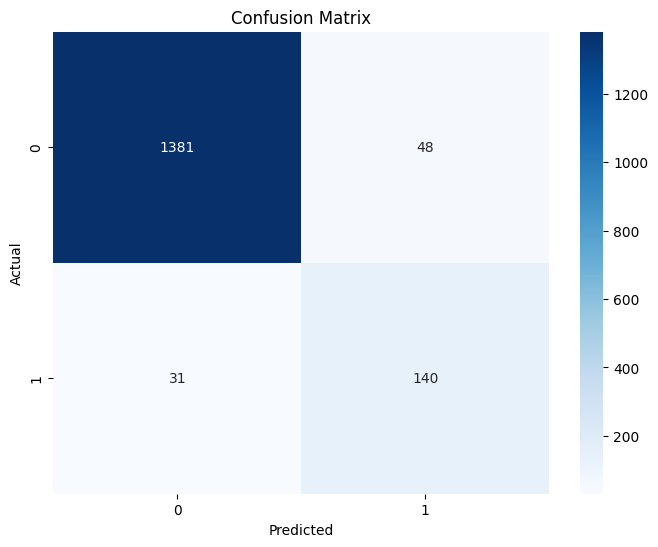

In [79]:
cm = confusion_matrix(y_test, y_pred)
class_labels = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [80]:
param_grid = {
    'n_estimators': [50, 100],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=111)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 2 folds for each of 96 candidates, totalling 192 fits
Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9714873078298176


In [81]:
y_pred = grid_search.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy on test set:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1429
           1       0.77      0.86      0.81       171

    accuracy                           0.96      1600
   macro avg       0.88      0.91      0.90      1600
weighted avg       0.96      0.96      0.96      1600

Accuracy on test set: 0.958125
